In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# precipitation
# https://ourworldindata.org/grapher/average-precipitation-per-year?tab=chart

# fertilizer usage
# https://ourworldindata.org/fertilizers#explore-data-on-fertilizers

# crop yield
# https://ourworldindata.org/crop-yields#explore-data-on-crop-yields

# temperature
# https://data.world/environmentdata/climate-change-earth-surface 

temp_df = pd.read_csv('original_data/GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv')
rain_df = pd.read_csv('original_data/average-precipitation-per-year.csv')
fert_df = pd.read_csv('original_data/fertilizer-use-per-hectare-of-cropland.csv')
yield_df = pd.read_csv('original_data/crop_yields_data.csv')

In [2]:
# convert to datetime
temp_df['dt'] = pd.to_datetime(temp_df['dt'])

temp_df['Year'] = temp_df['dt'].dt.year
temp_df = temp_df[(temp_df['Year'] >= 1965) & (temp_df['Year'] <= 2013)]
temp_df = temp_df.groupby(['Year', 'Country'])['AverageTemperature'].mean().reset_index() 

In [3]:
rain_df = rain_df[(rain_df['Year'] >= 1965) & (rain_df['Year'] <= 2013)]
rain_df = rain_df.drop(columns=['Code']).rename(columns={'Entity': 'Country'}) 

In [4]:
fert_df = fert_df.drop(columns=['Code']) 
fert_df = fert_df.rename(columns={'Entity': 'Country'})
fert_df = fert_df[(fert_df['Year'] >= 1965) & (fert_df['Year'] <= 2013)] 

In [5]:
selected_columns = ['country', 'year', 'vegetables_yield', 'roots_and_tubers_yield', 'other_vegetables__fresh_n_e_c_yield', 'fruit_yield', 'cereal_yield']
yield_df = yield_df[selected_columns]
yield_df = yield_df.rename(columns={'year': 'Year', 'country': 'Country'})
yield_df = yield_df[(yield_df['Year'] >= 1965) & (yield_df['Year'] <= 2013)] 

In [6]:
merged_df = pd.merge(temp_df, rain_df, on=['Year', 'Country'], how='inner')
merged_df = pd.merge(merged_df, fert_df, on=['Year', 'Country'], how='inner')
merged_df = pd.merge(merged_df, yield_df, on=['Year', 'Country'], how='inner') 

In [7]:
yield_columns = ['vegetables_yield', 'roots_and_tubers_yield', 'other_vegetables__fresh_n_e_c_yield', 'fruit_yield', 'cereal_yield']
 
item_mapping = {
    'vegetables_yield': 'Vegetables',
    'roots_and_tubers_yield': 'Roots and Tubers',
    'other_vegetables__fresh_n_e_c_yield': 'Other Vegetables (Fresh, N.E.C.)',
    'fruit_yield': 'Fruit',
    'cereal_yield': 'Cereal'
}
 
transformed_data = []
 
for index, row in merged_df.iterrows(): 
    common_data = row[['Year', 'Country', 'AverageTemperature', 'Precipitation(mm/year)', 'Pesticides(tones/ha)']]
    
    for yield_column in yield_columns:
        item = item_mapping[yield_column]  # Use the item name mapping
        yield_value = row[yield_column]  # Extract yield value
        
        new_row = common_data.copy()
        new_row['Item'] = item
        new_row['Yield(tones/ha)'] = yield_value
        
        transformed_data.append(new_row)

yield_df = pd.DataFrame(transformed_data)

In [8]:
float_columns = ['AverageTemperature', 'Precipitation(mm/year)', 'Pesticides(tones/ha)', 'Yield(tones/ha)']

yield_df[float_columns] = yield_df[float_columns].round(2) 

In [9]:
import os
# for some reason, if i dont save the dataframe to a file and reload it, the plots won't work
yield_df.to_csv("1.csv")
yield_df = pd.read_csv("1.csv")

os.remove('1.csv')

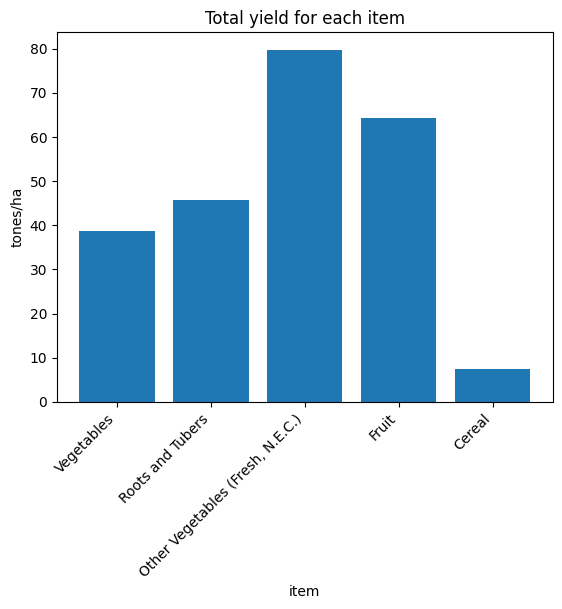

In [10]:
plt.bar(yield_df['Item'], yield_df['Yield(tones/ha)'])
plt.title('Total yield for each item')
plt.xlabel('item')
plt.ylabel('tones/ha')
plt.xticks(rotation=45, ha='right')
plt.show()

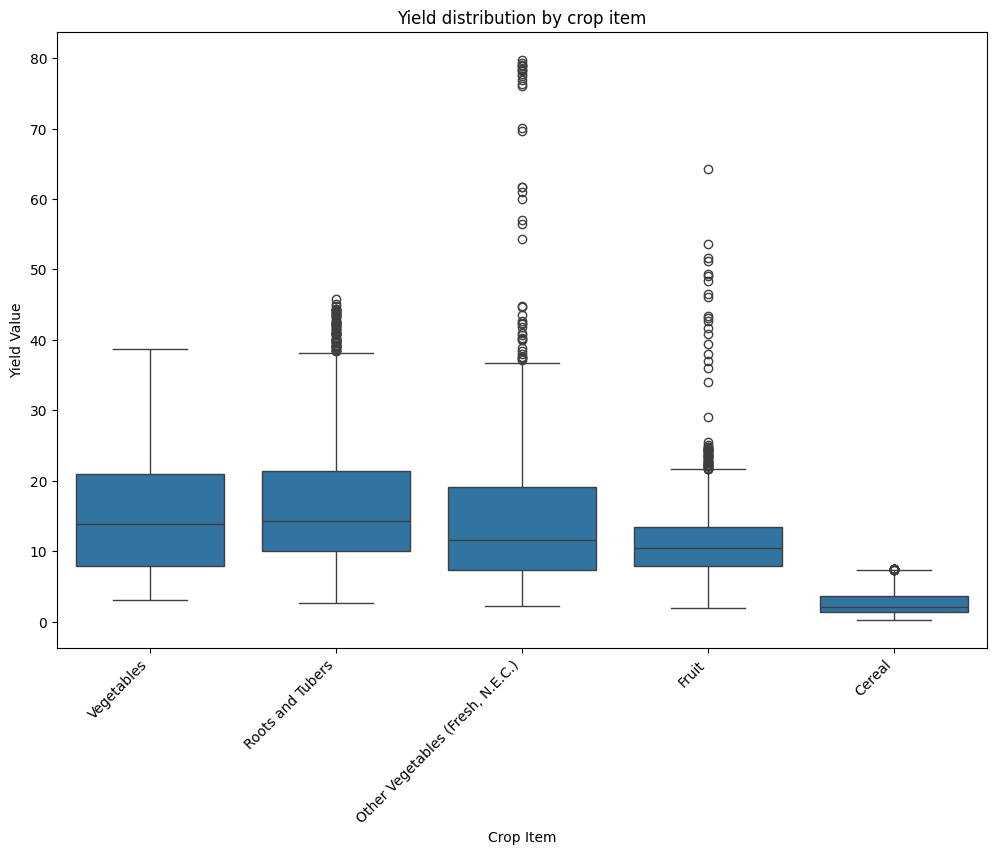

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Item', y='Yield(tones/ha)', data=yield_df)
plt.title('Yield distribution by crop item')
plt.xlabel('Crop Item')
plt.ylabel('Yield Value')
plt.xticks(rotation=45, ha='right')
plt.show()

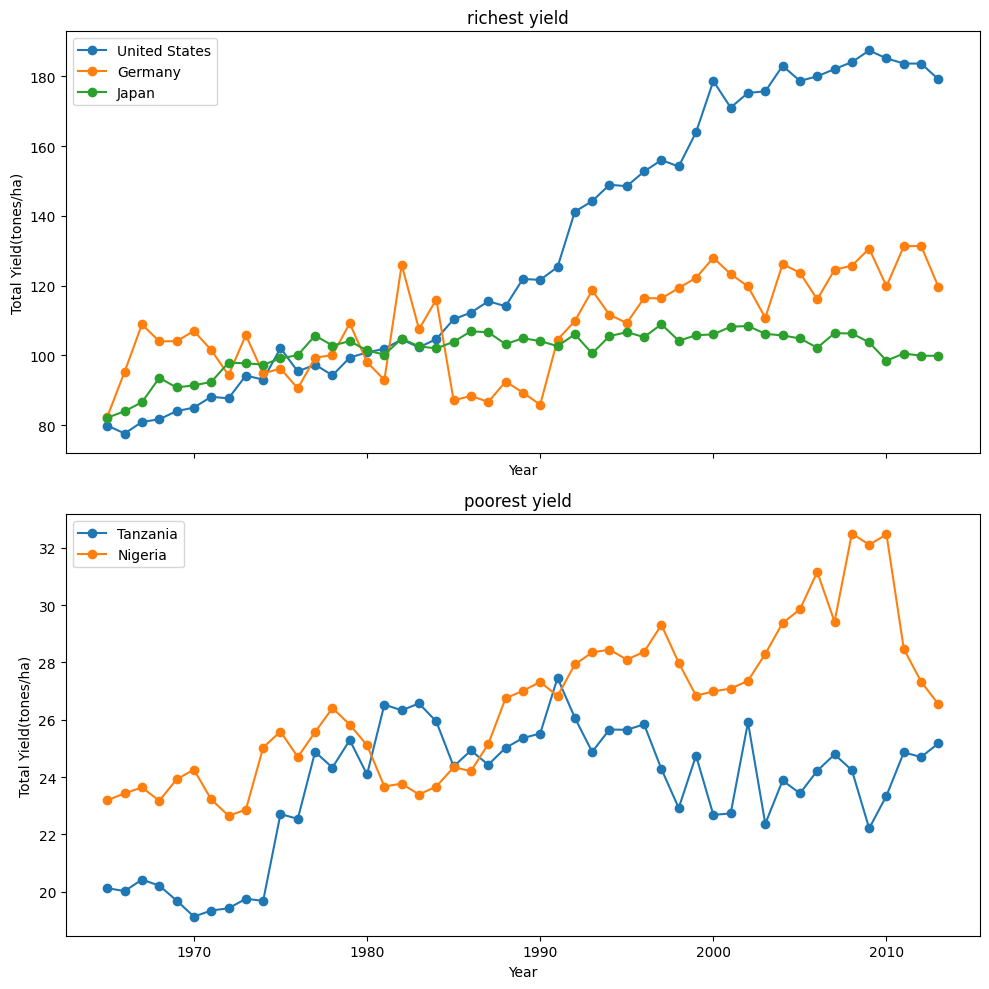

In [12]:

plot_1_countries = ['United States', 'Germany', 'Japan']
plot_2_countries = ['Tanzania', 'Nigeria'] 

countries_to_plot = [plot_1_countries, plot_2_countries]
plot_titles = ["richest yield", "poorest yield"]
 
fig, axes = plt.subplots(nrows=len(countries_to_plot), ncols=1, figsize=(10, 5 * len(countries_to_plot)), sharex=True)
 
for i, countries in enumerate(countries_to_plot):
    for country in countries:
        country_data = yield_df[yield_df['Country'] == country].groupby('Year')['Yield(tones/ha)'].sum().reset_index()
        axes[i].plot(country_data['Year'], country_data['Yield(tones/ha)'], label=country, marker='o')

    axes[i].set_title(f'{plot_titles[i]}  ')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Total Yield(tones/ha)')
    axes[i].legend()

plt.tight_layout()
plt.show()


### Data Exploration

In [13]:
yield_df.describe()

,Unnamed: 0,Year,AverageTemperature,Precipitation(mm/year),Pesticides(tones/ha),Yield(tones/ha)
count,9630.000000,9630.000000,9630.000000,9630.000000,9630.000000,9597.000000
mean,962.500000,1989.473520,18.331703,1015.734631,98.954694,11.952515
std,556.017104,14.185838,6.726361,752.530700,109.333271,8.969237
min,0.000000,1965.000000,4.200000,18.100000,0.110000,0.270000
25%,481.000000,1977.000000,12.680000,534.000000,20.290000,5.660000
50%,962.500000,1990.000000,17.775000,715.000000,60.020000,10.160000
75%,1444.000000,2002.000000,25.330000,1522.000000,122.610000,16.450000
max,1925.000000,2013.000000,30.650000,3240.000000,515.580000,79.750000


In [14]:
yield_df.groupby(['Country'],sort=True)['Yield(tones/ha)'].sum().nsmallest(10)

Country
Sudan            85.65
Ethiopia        601.82
Ukraine        1118.88
Zimbabwe       1149.41
Tanzania       1158.68
Russia         1215.23
Nigeria        1299.00
Angola         1387.57
Philippines    1674.86
Bangladesh     1780.53
Name: Yield(tones/ha), dtype: float64

In [15]:
yield_df.groupby(['Country'],sort=True)['Yield(tones/ha)'].sum().nsmallest(10)

Country
Sudan            85.65
Ethiopia        601.82
Ukraine        1118.88
Zimbabwe       1149.41
Tanzania       1158.68
Russia         1215.23
Nigeria        1299.00
Angola         1387.57
Philippines    1674.86
Bangladesh     1780.53
Name: Yield(tones/ha), dtype: float64

In [16]:
yield_df = yield_df.drop(columns=['Unnamed: 0'])
yield_df.groupby('Item').count()

,Year,Country,AverageTemperature,Precipitation(mm/year),Pesticides(tones/ha),Yield(tones/ha)
Item,,,,,,
Cereal,1926,1926,1926,1926,1926,1926
Fruit,1926,1926,1926,1926,1926,1926
"Other Vegetables (Fresh, N.E.C.)",1926,1926,1926,1926,1926,1894
Roots and Tubers,1926,1926,1926,1926,1926,1925
Vegetables,1926,1926,1926,1926,1926,1926


In [17]:
item_counts = yield_df['Item'].value_counts()
print(item_counts)

Vegetables                          1926
Roots and Tubers                    1926
Other Vegetables (Fresh, N.E.C.)    1926
Fruit                               1926
Cereal                              1926
Name: Item, dtype: int64


/var/folders/zc/ndxw3gq100s4y4g6l1dmhflh0000gn/T/ipykernel_51021/4102105752.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation_data, dtype=np.bool)


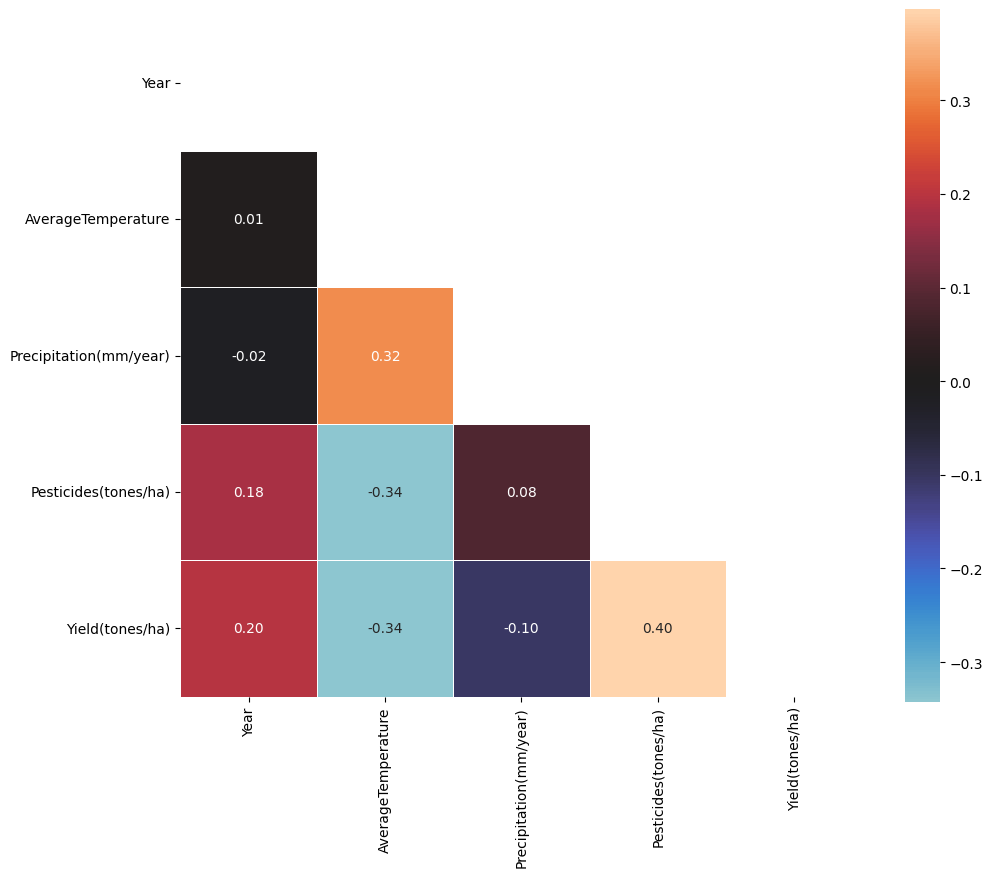

In [18]:
correlation_data = yield_df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, annot=True, fmt=".2f",
            center=0, square=True, linewidths=.5)

plt.show()